In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ncreate3d as nc
import numpy as np
import os
import functools
import operator
from stl import mesh
import matplotlib.pyplot as plt
import folderparser as fp

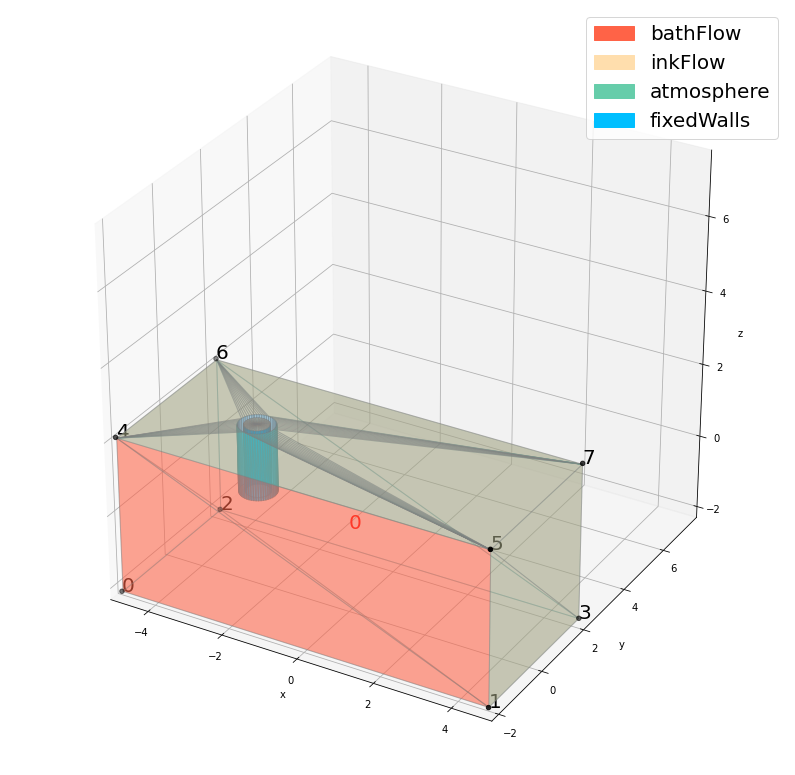

In [22]:
bathwidth = 16 # times nozzle width
bathheight = 7
bathdepth = 7
frontwidth = 4
printspeed = 10 # mm/s
npts = 50 # number of points in the nozzle circle

geo = nc.NozVars(bathwidth, bathheight, bathdepth, frontwidth, printspeed, npts)
mv = nc.MeshVars()
mv.maxRefinement = 4
out = nc.createNozzleBlockFile(geo, mv, True, r'C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\dummy')
# nc.exportallfiles(out, True)
out.makePlot()

In [14]:
out.plot.savefig(r'C:\Users\lmf1\OneDriveNIST\NIST\data\openfoam\summaries\plots\dims.svg')

Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\geometry.csv
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\Allrun
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\Allclean
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\Allrun
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\mesh\Allclean
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\mesh\Allrun
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\0\alpha.ink.orig
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\0\alpha.ink
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\0\p_rgh
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\case\0\U
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\mesh\0\pointLevel
Exported file C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb32\mesh\0\cellLevel
Exported file C:\users\lmf1\documents\OpenFOAM\nozzl

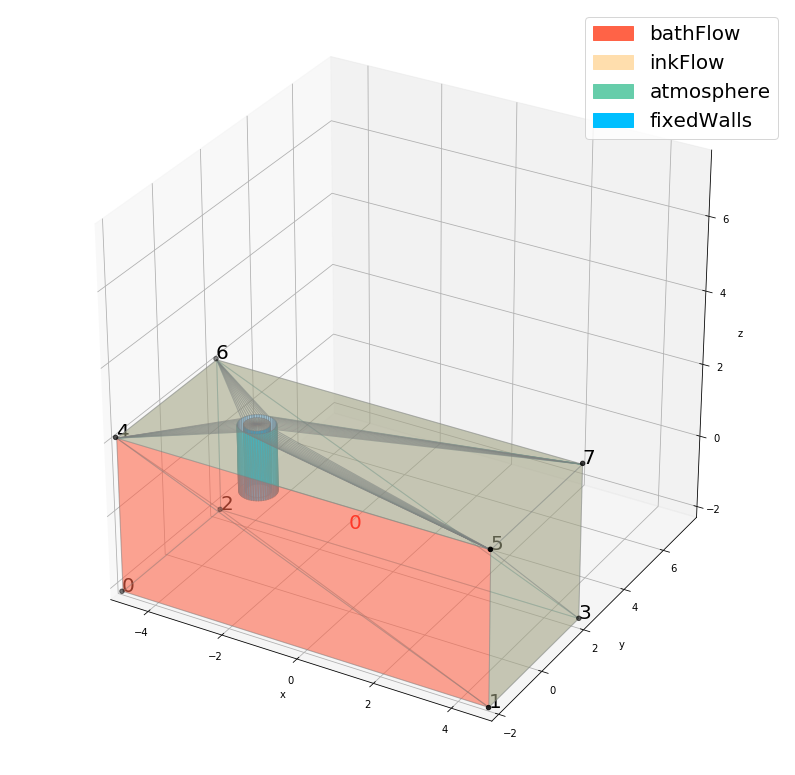

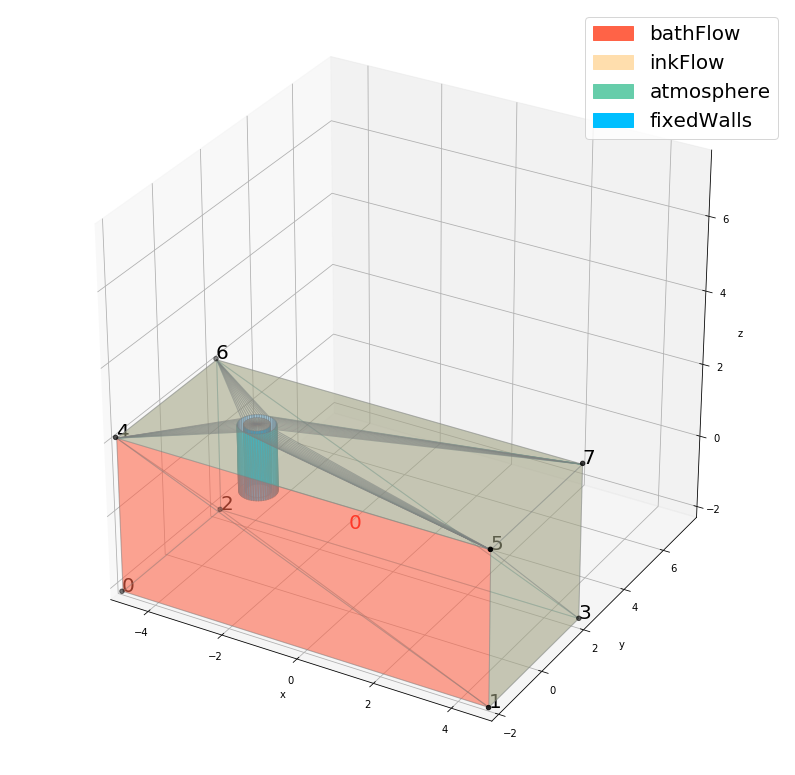

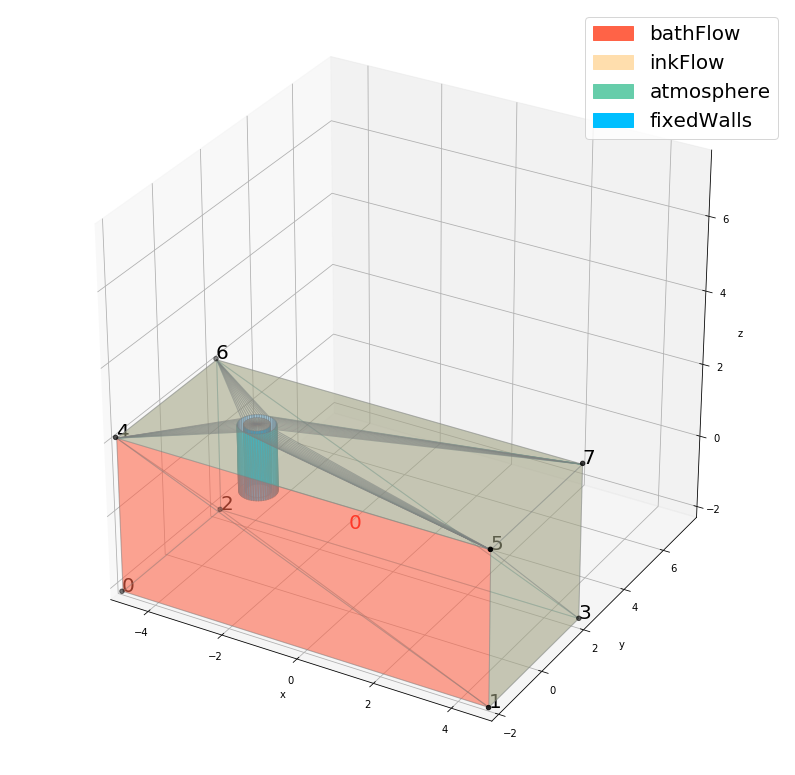

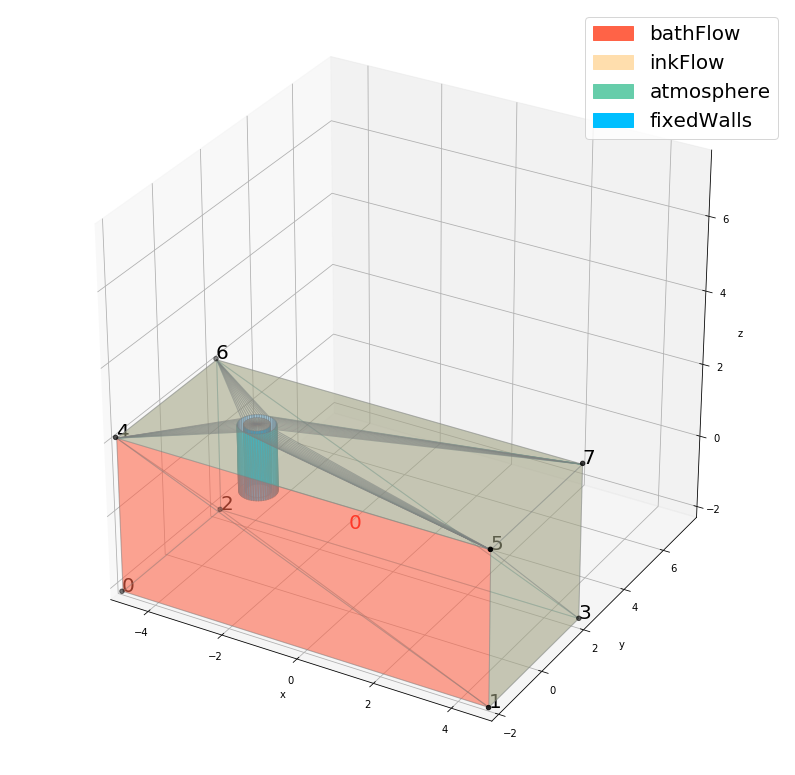

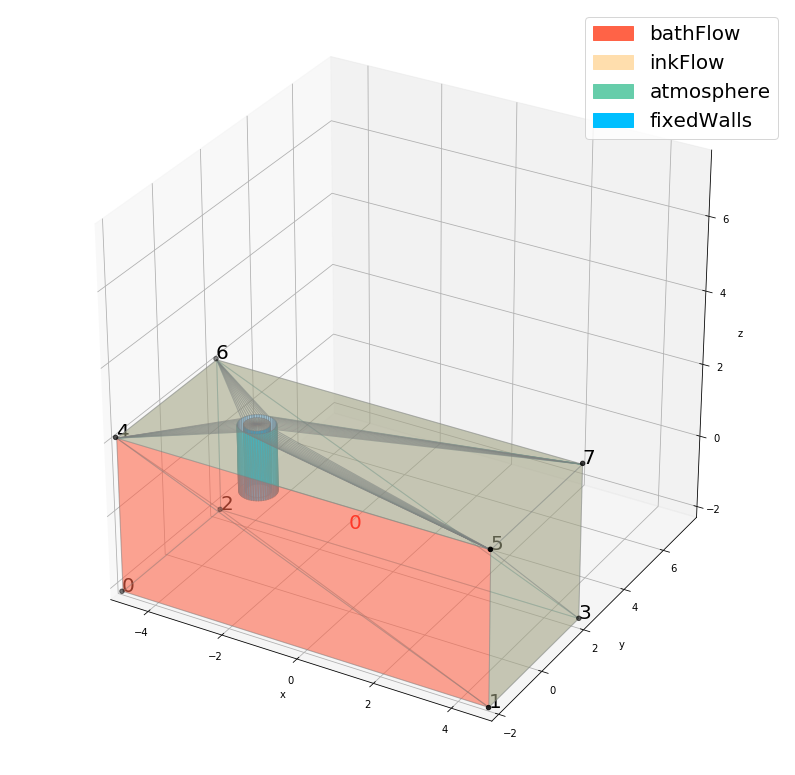

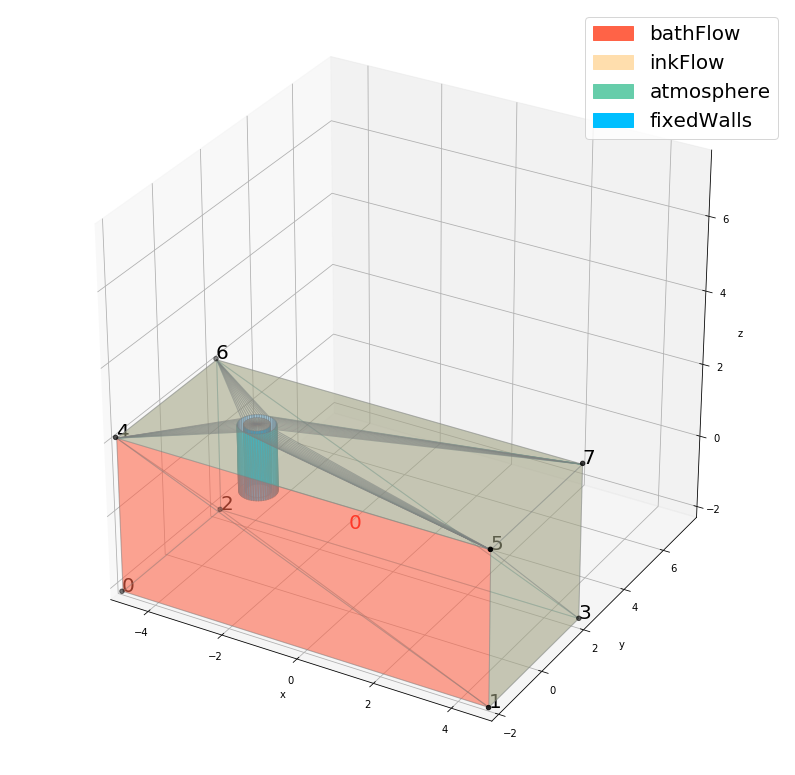

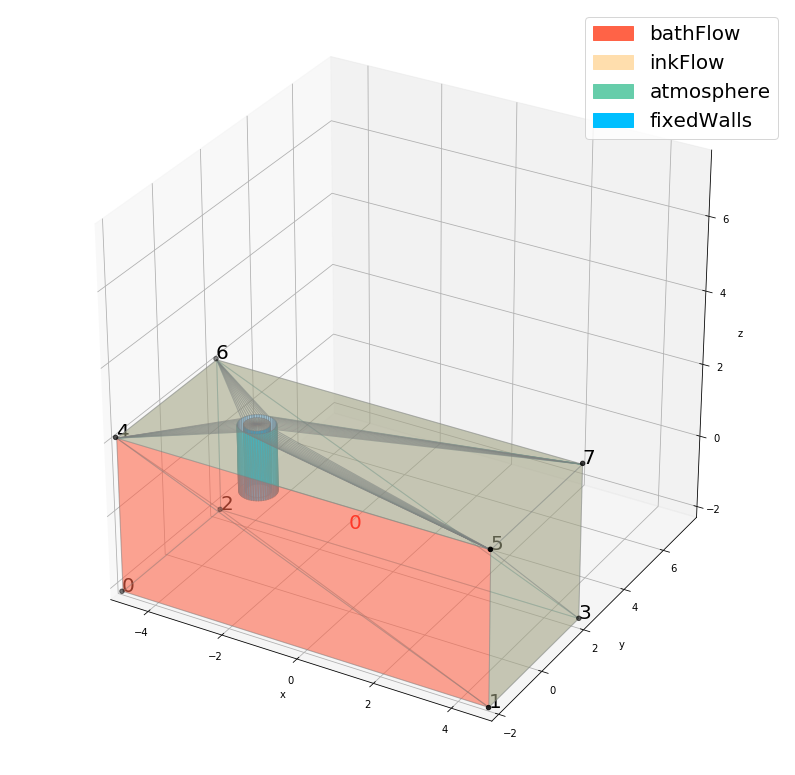

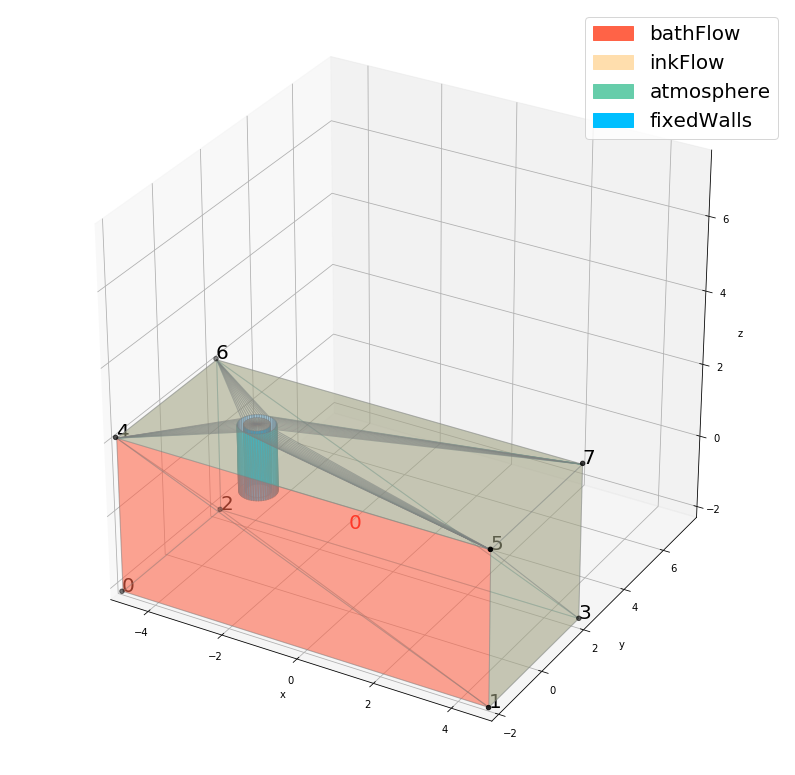

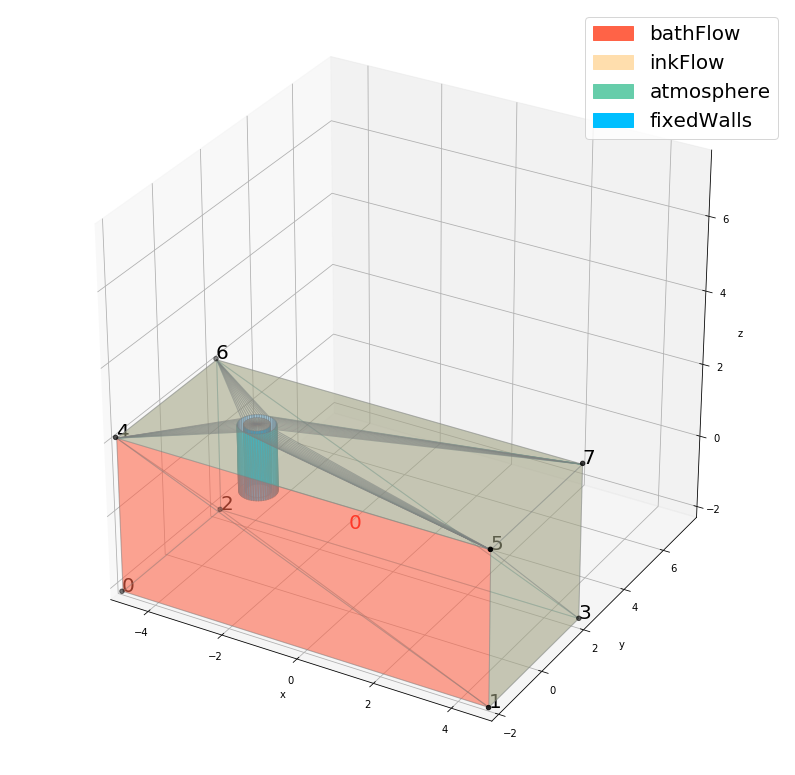

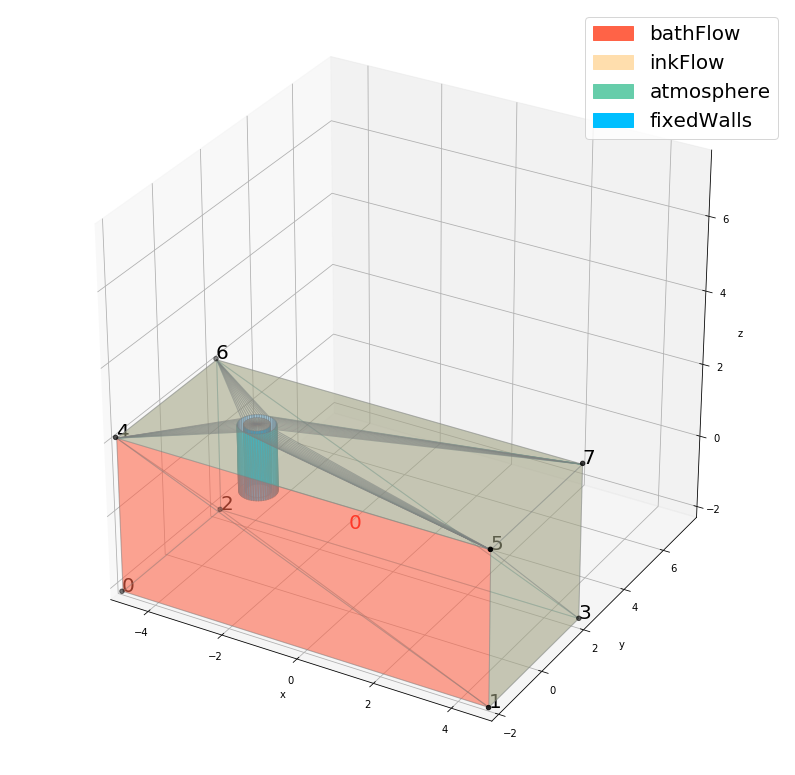

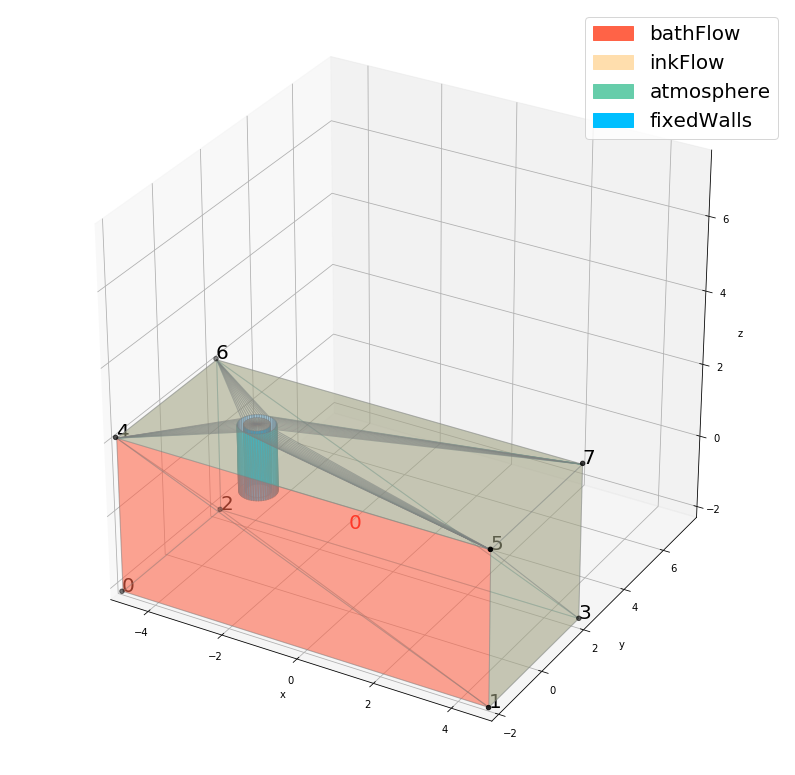

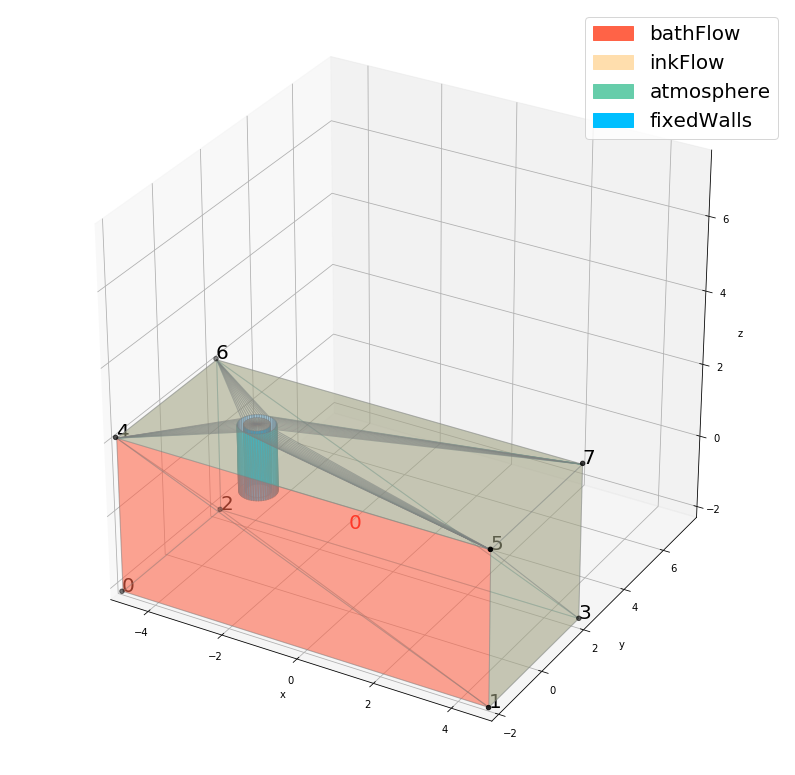

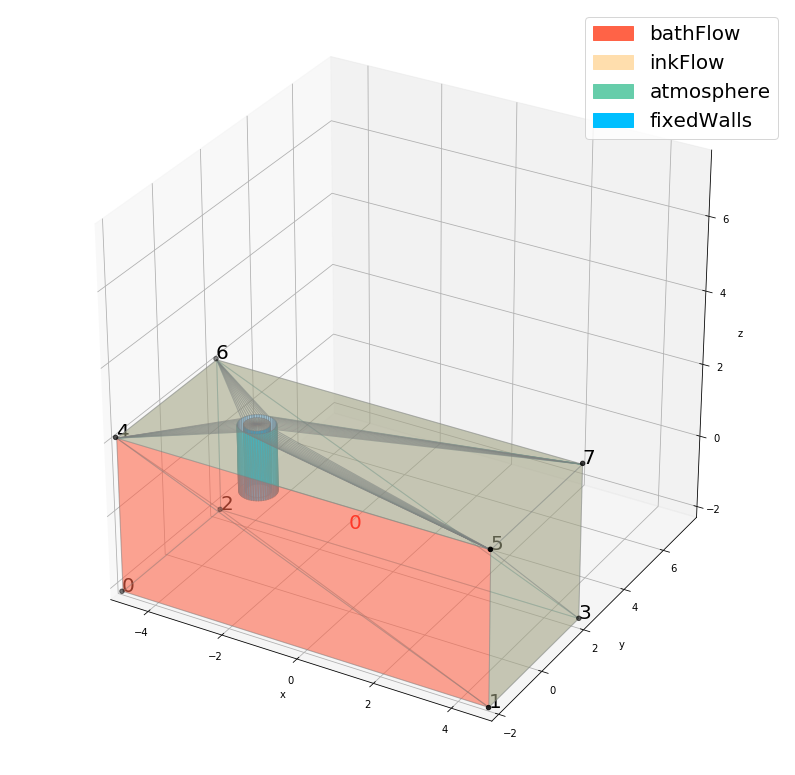

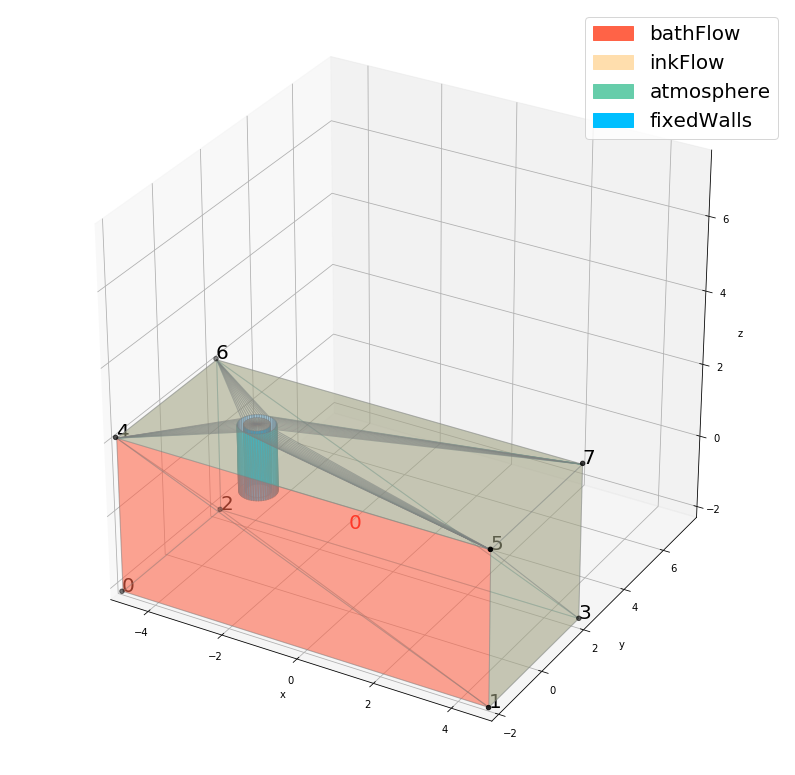

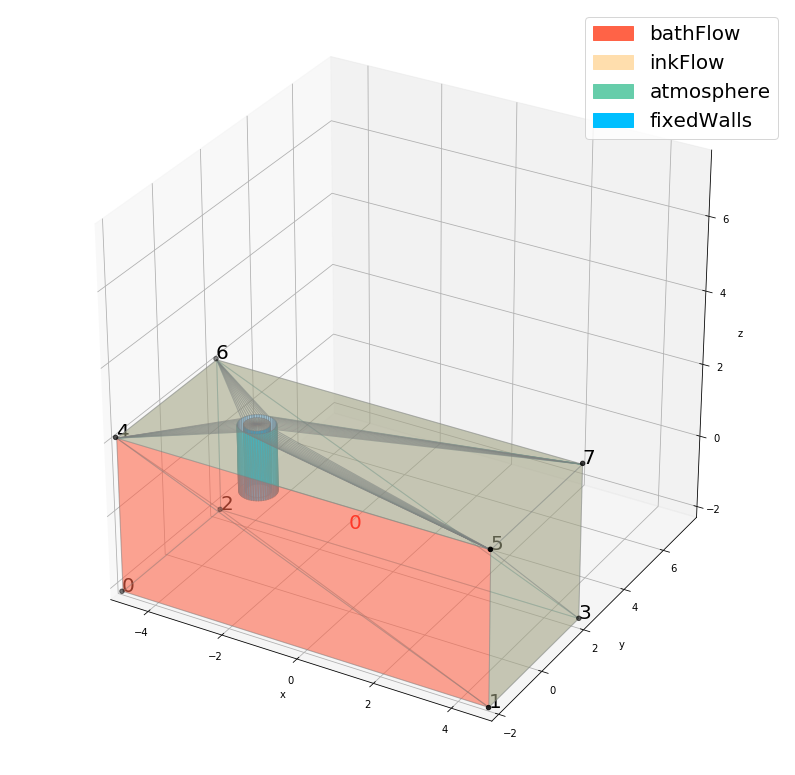

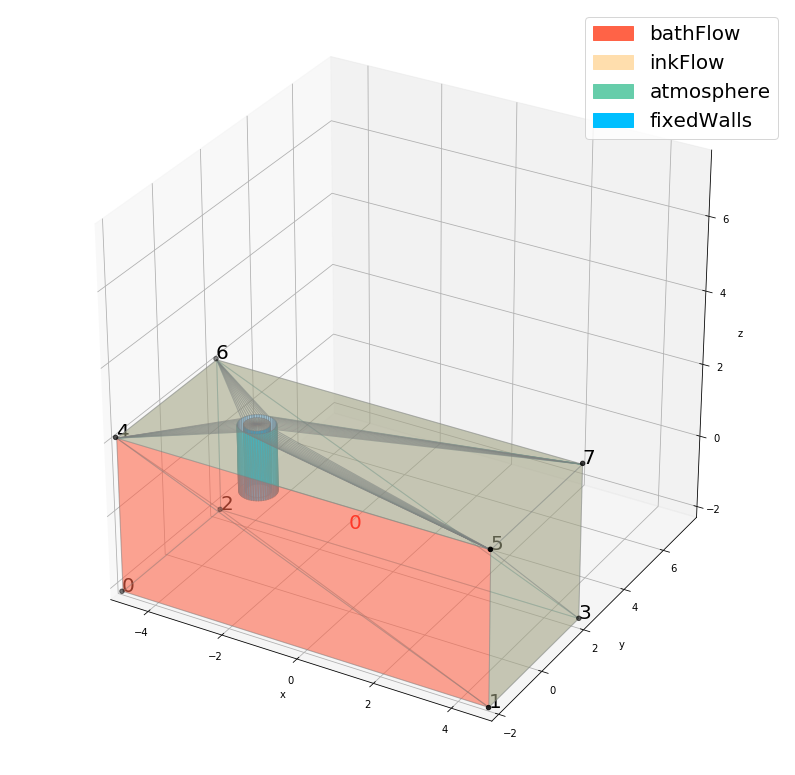

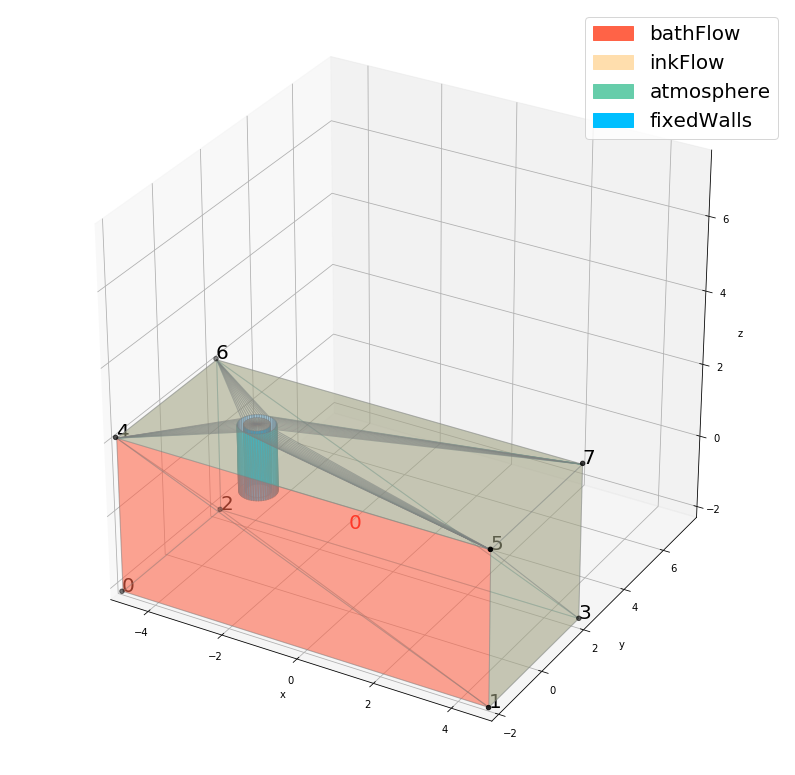

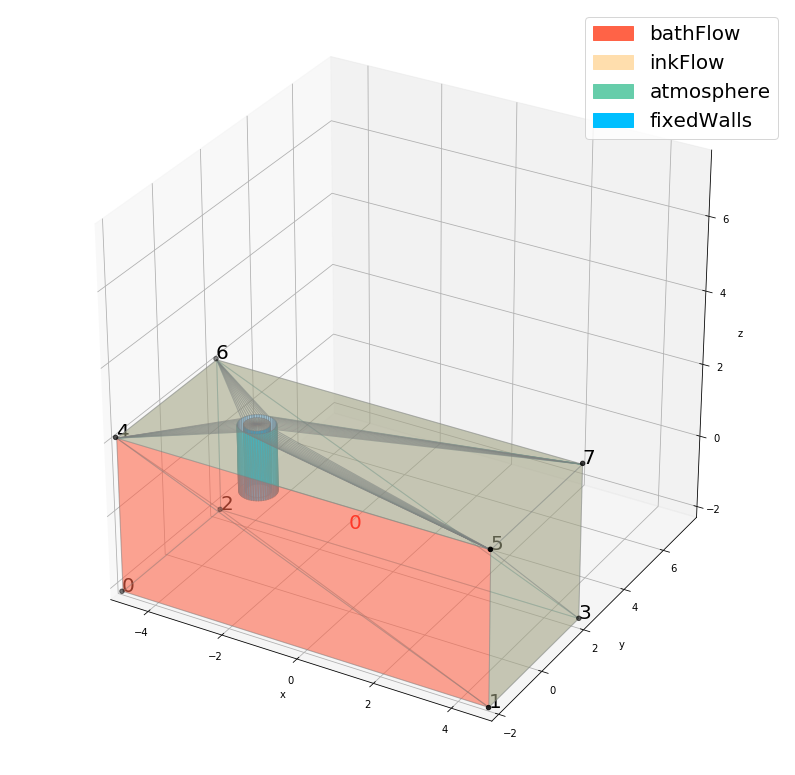

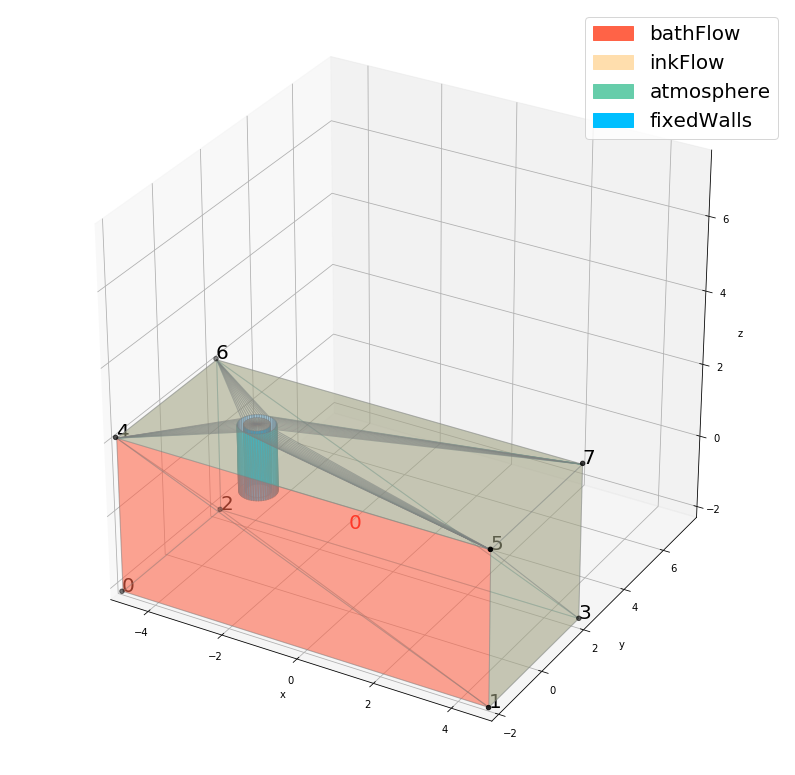

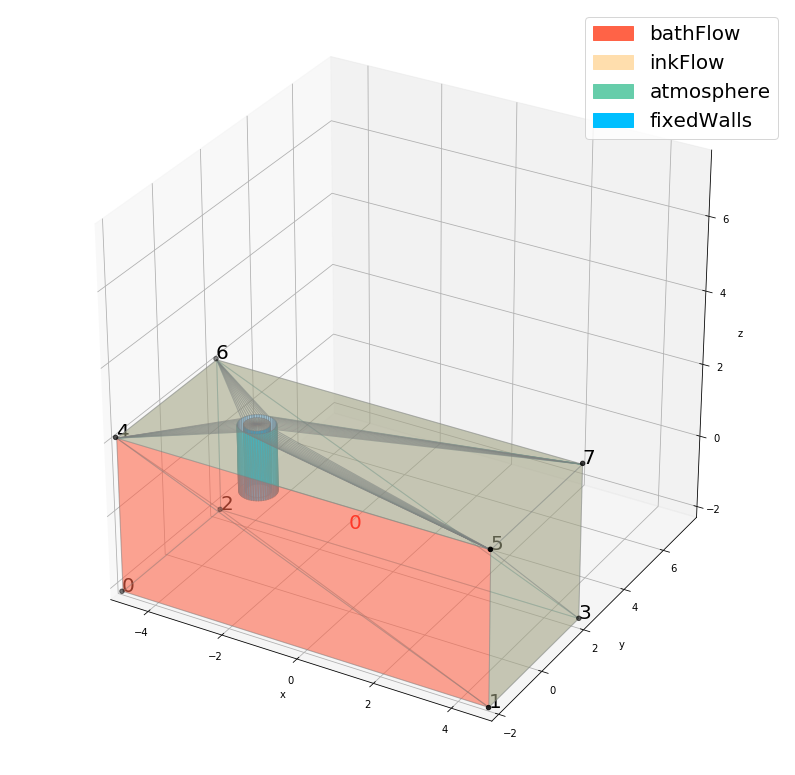

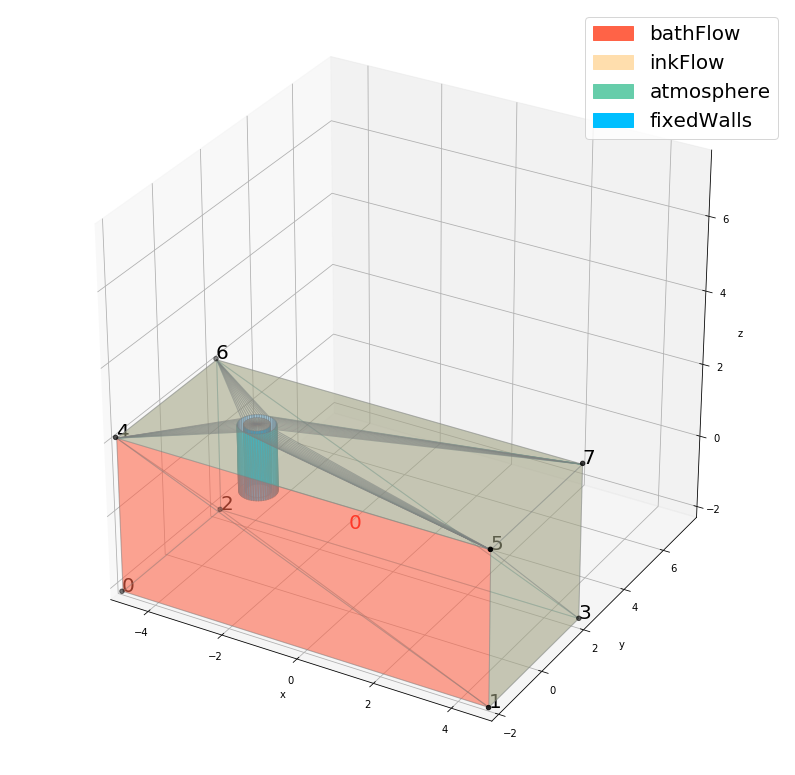

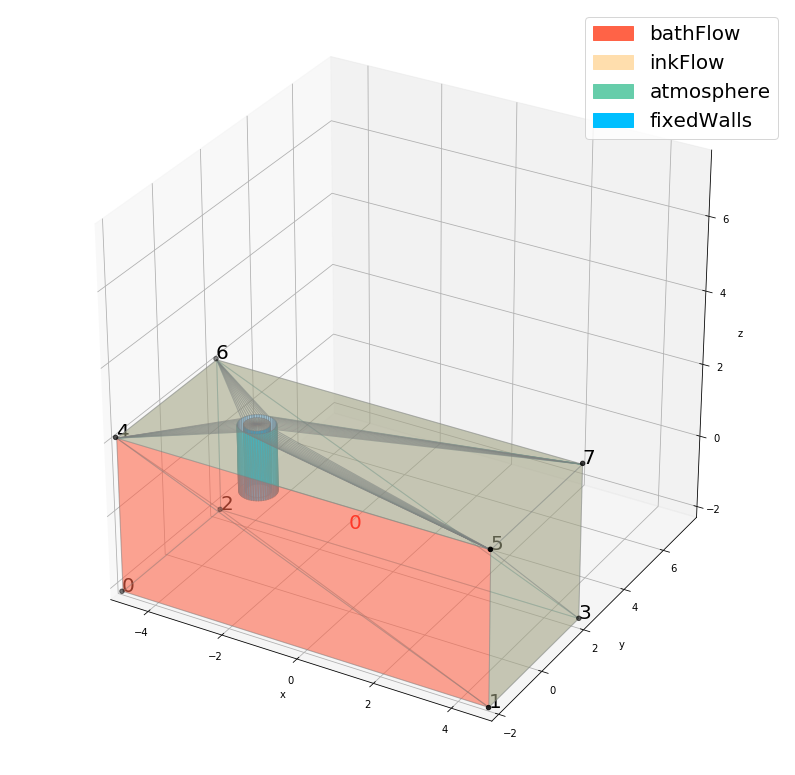

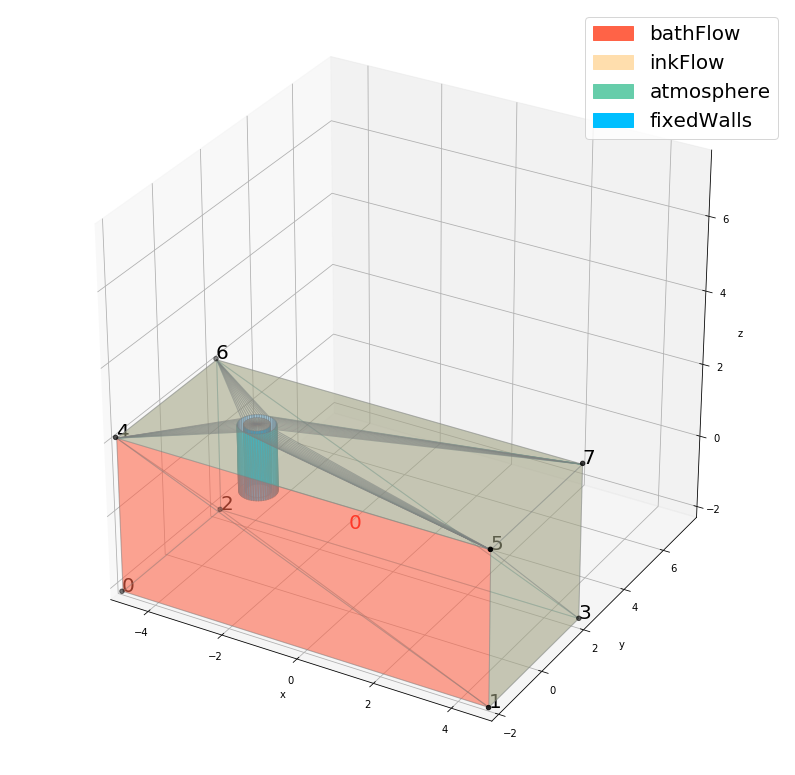

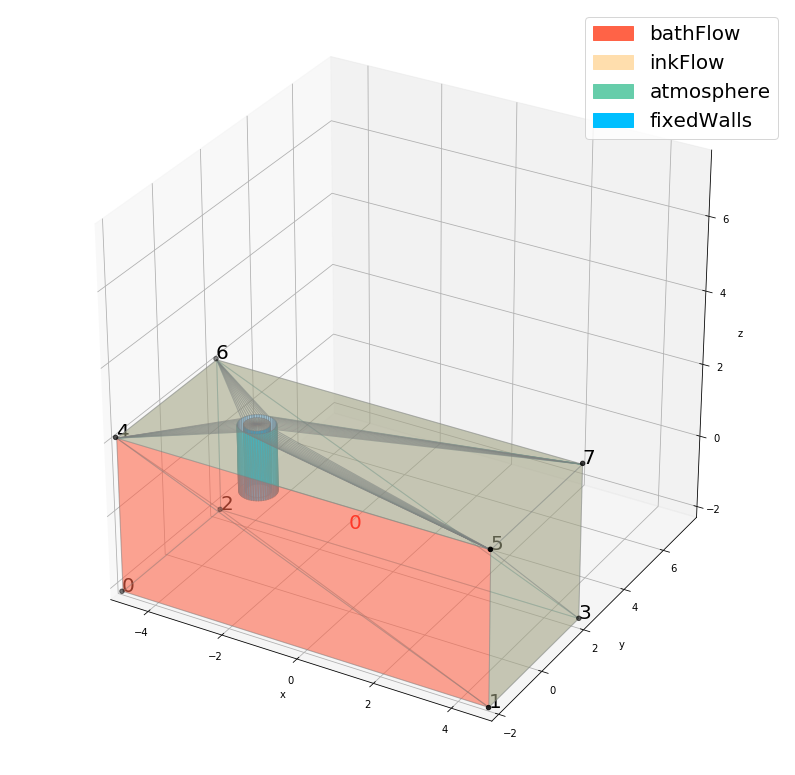

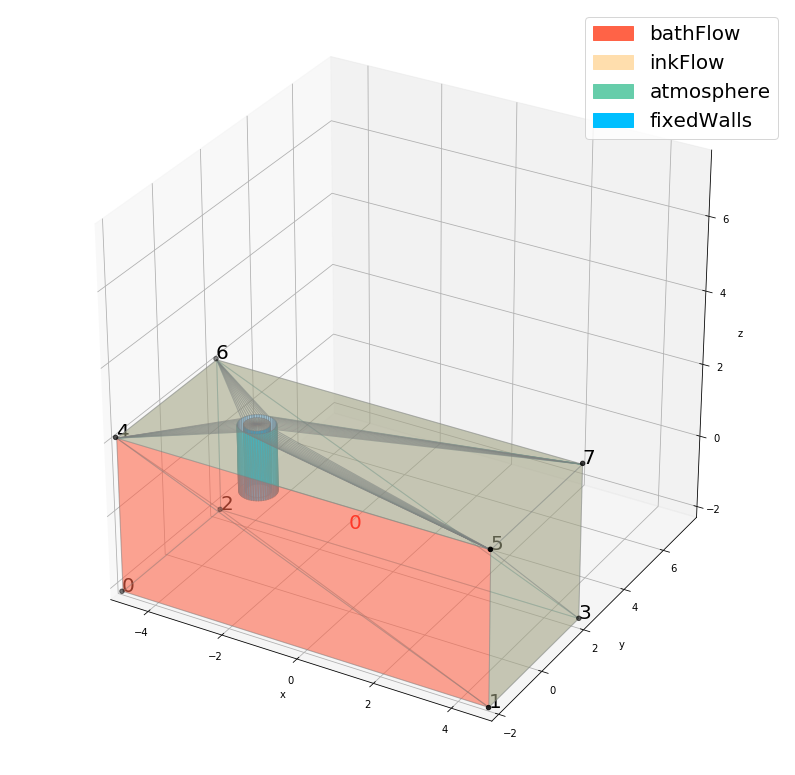

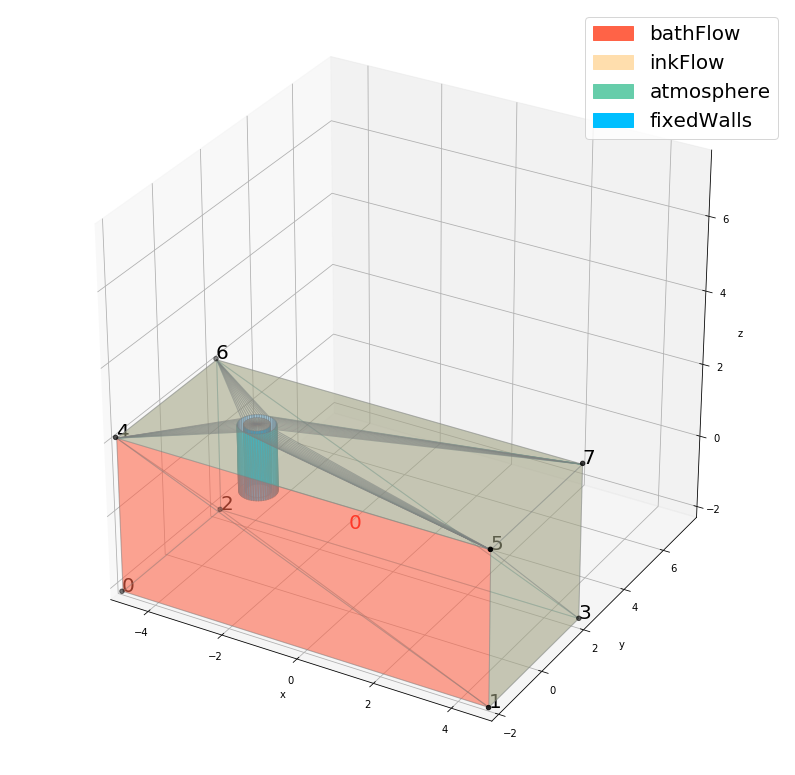

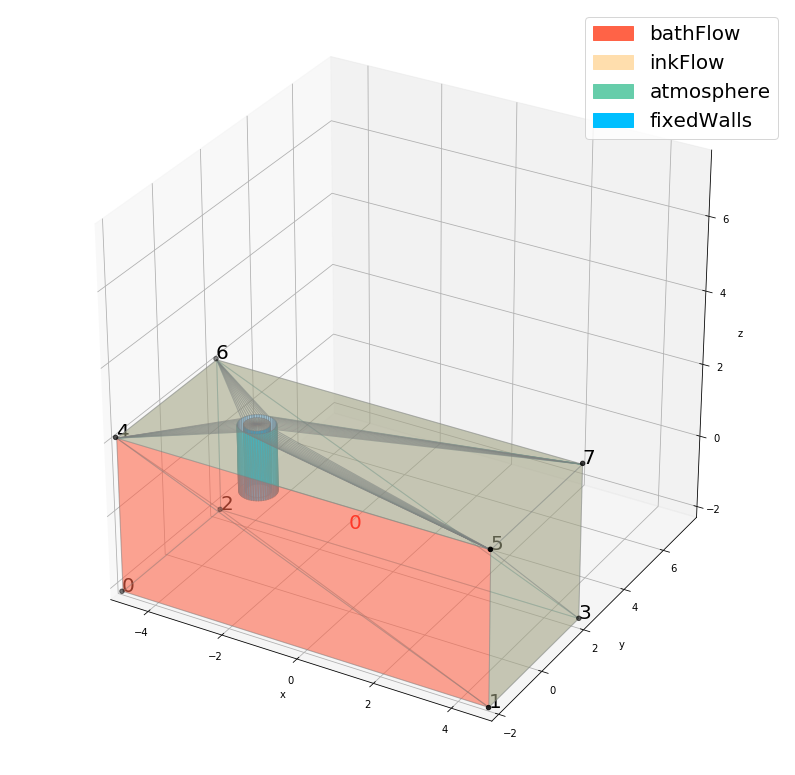

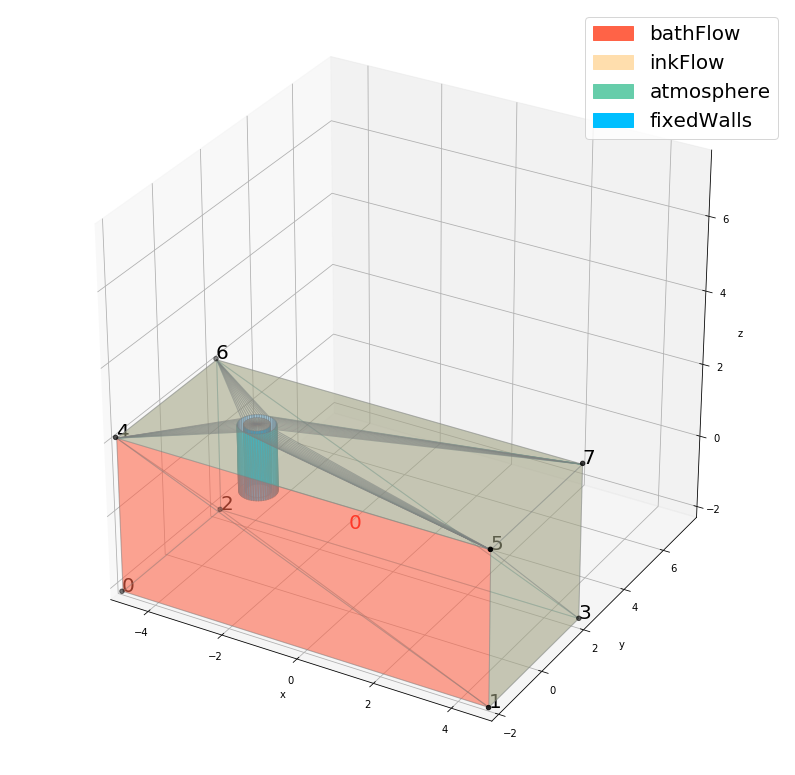

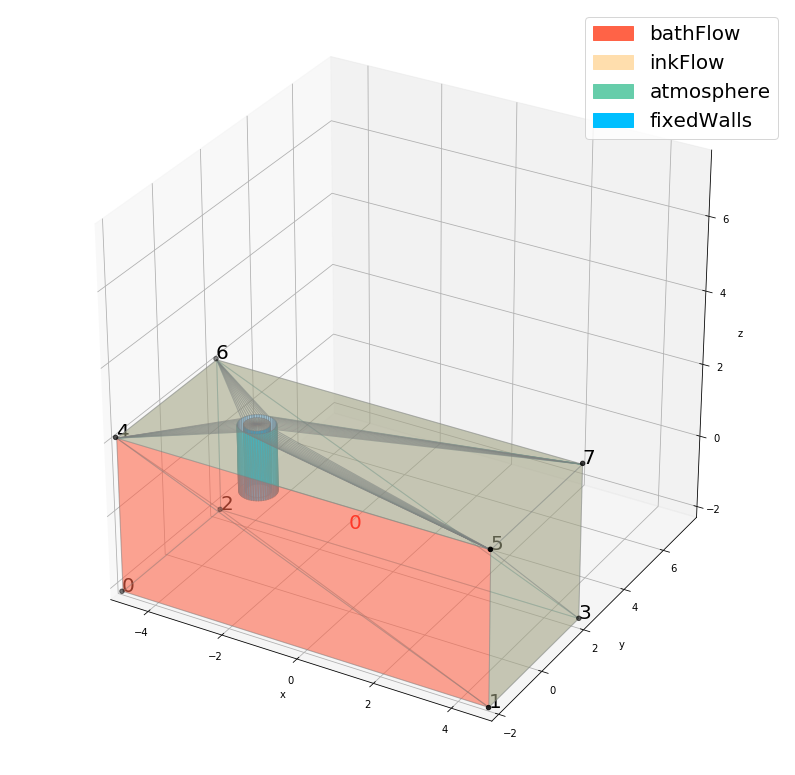

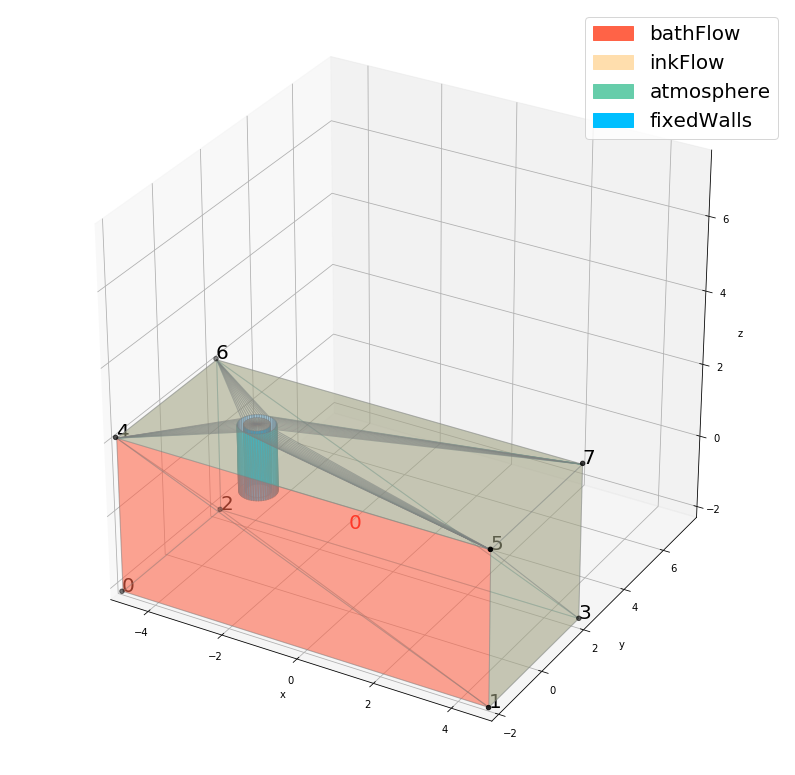

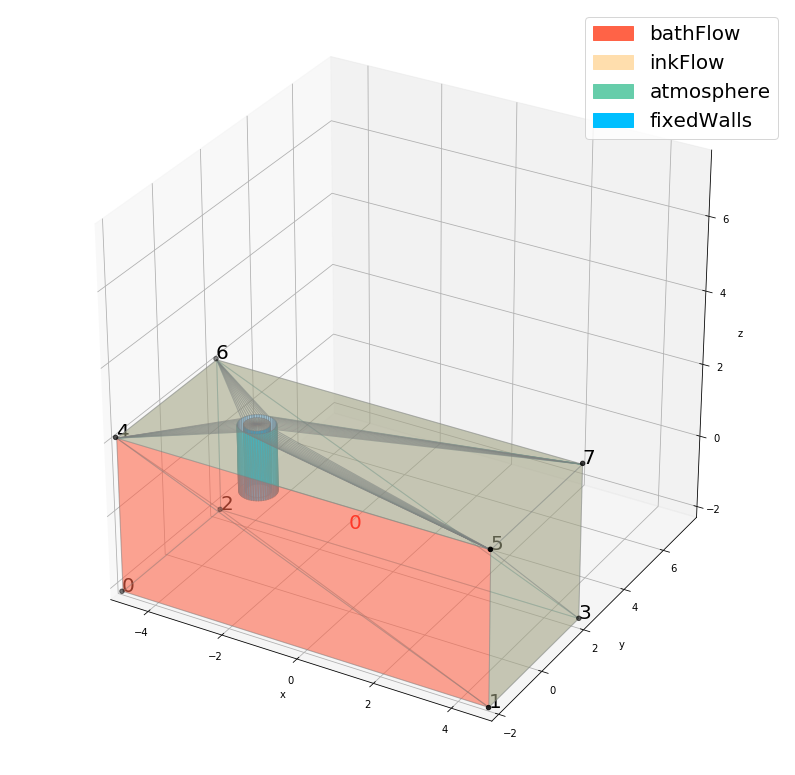

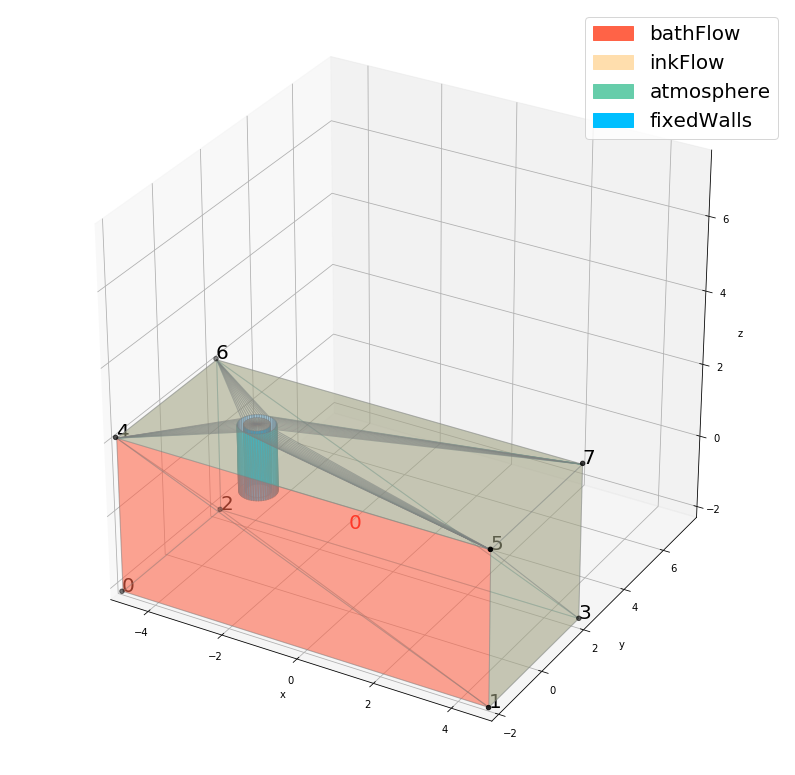

In [7]:
exportmesh = False
ii = 32
for ivisc in [0.001, 0.01, 0.1, 1]:
    for svisc in [0.001, 0.01, 0.1, 1]:
        for sigma in [0.04, 0]:
            folder = r"C:\users\lmf1\documents\OpenFOAM\nozzlebath3d\nb"+str(ii)

            bathwidth = 16 # times nozzle width
            bathheight = 7
            bathdepth = 7
            frontwidth = 4
            printspeed = 10 # mm/s
            npts = 50 # number of points in the nozzle circle

            geo = nc.NozVars(bathwidth, bathheight, bathdepth, frontwidth, printspeed, npts)
            mv = nc.MeshVars()
            mv.maxRefinement = 4
            out = nc.createNozzleBlockFile(geo, mv, exportmesh)

            starttime = 0
            endtime = 2.5
            dt = 0.001
            writedt = 0.1
            solver = "interFoam" # options: interFoam, interIsoFoam
            [cdv, fvv] = nc.solverobjects(starttime, endtime, dt, writedt, solver)
            cdv.startFrom = "latestTime"
            cdv.adjustTimeStep = "yes"
            #cdv.runTimeModifiable = "yes"
            out = nc.compileSolverFiles(cdv, fvv, out)

            ink = nc.transportGroupNewt("ink", ivisc, 1000)
            sup = nc.transportGroupNewt("sup", svisc, 1000)
#             sigma = 0.040
            out.transportProperties = nc.compileTransportProperties(ink, sup, sigma)

            nc.exportallfiles(folder, out, exportmesh)
            ii+=1


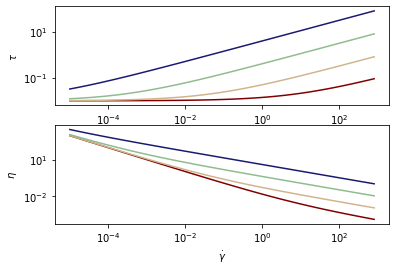

In [41]:
fig, axs = plt.subplots(2)
colorlist = ['maroon', 'tan', 'darkseagreen', 'midnightblue']
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
nu0 = 10^6/1000 # m^2/s
x = np.array(np.arange(-5.0,3.0, 0.1))
gammadot = 10**x
for i,k in enumerate([4/1000, 40/1000, 400/1000, 4000/1000]):
    
    tau = tau0 + k*gammadot**n
    eta = tau/gammadot
    axs[0].plot(gammadot, tau, color=colorlist[i])
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel('$\dot{\gamma}$')
    axs[0].set_ylabel('$\\tau$')
    axs[1].plot(gammadot, eta, color=colorlist[i])
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel('$\dot{\gamma}$')
    axs[1].set_ylabel('$\eta$')

In [ ]:
topfolder = r"C:\users\lmf1\documents\OpenFOAM\HBsweep"
exportmesh = False
ii = 94
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
#nu0 = 10^6/1000 # m^2/s
for ivisc in [0.01]:
    for nu0 in [1, 10, 100, 1000, 10000]:
        for sigma in [0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

In [37]:
exportmesh = False
ii = 104
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
#nu0 = 10^6/1000 # m^2/s
for ivisc in [0.01]:
    for nu0 in [1, 10, 100, 1000, 10000]:
        for sigma in [0.07]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1
for ivisc in [0.0001, 0.001, 0.1, 1]:
    for nu0 in [1, 10, 100, 1000, 10000]:
        for sigma in [0.0, 0.04, 0.07]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

ncreate imported
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\geometry.csv
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\Allclean
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\Allrun
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\Continue
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\0\alpha.ink.orig
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\0\alpha.ink
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\0\p_rgh
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\0\U
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\constant\g
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\constant\transportProperties
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\constant\turbulenceProperties
Exported file C:\users\lmf1\documents\OpenFOAM\HBsweep\nb104\case\constant\dynamicMeshDict
Exported file C:\users

In [9]:
exportmesh = False
ii = 169
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d'

for svisc in [0.0001, 0.001, 0.1, 1]:
    for nu0 in [0.1, 1, 10, 100]:
        for sigma in [0.0, 0.04, 0.07]:
            nc.newtHBexport(ii, tau0, k, n, svisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

ncreate imported
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb169\case\0\p_rgh
Exported file C:\Users\lmf1\

In [16]:
exportmesh = False
ii = 263
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep'

for svisc in [10/1000.]:
    for nu0 in [0.1, 1, 10, 100]:
        for sigma in [0.0, 0.04]:
            nc.newtHBexport(ii, tau0, k, n, svisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\0\U
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\constant\g
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\constant\transportProperties
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\constant\turbulenceProperties
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb263\case\constant\dynamic

In [8]:
exportmesh = False
ii = 229
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d'

for svisc in [0.001, 0.01]:
    for nu0 in [0.001, 0.01]:
        for sigma in [0.0, 0.04]:
            nc.newtHBexport(ii, tau0, k, n, svisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb229\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOA

In [15]:
exportmesh = False
ii = 633
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep'

for svisc in [10**-3*i for i in [10**-2, 10**3, 10**4, 10**5]]:
    for inu0 in [10**-3*i for i in [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]]:
        for sigma in [0.0, 0.04]:
            nc.newtHBexport(ii, tau0, k, n, svisc, inu0, sigma, topfolder, exportmesh)
            ii+=1
for svisc in [10**-3*i for i in [10**-1, 10**0, 10**1, 10**2]]:
    for inu0 in [10**-3*i for i in [10**-2]]:
        for sigma in [0.0, 0.04]:
            nc.newtHBexport(ii, tau0, k, n, svisc, inu0, sigma, topfolder, exportmesh)
            ii+=1
for svisc in [10**-3*i for i in [10**2]]:
    for inu0 in [10**-3*i for i in [10**-1, 10**0, 10**1]]:
        for sigma in [0.0, 0.04]:
            nc.newtHBexport(ii, tau0, k, n, svisc, inu0, sigma, topfolder, exportmesh)
            ii+=1            

Created directory C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBsweep\nb633\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtHBswee

In [9]:
exportmesh = False
ii = 237
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
#nu0 = 10^6/1000 # m^2/s
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep'
for ivisc in [0.0001, 0.001]:
    for nu0 in [0.001, 0.01, 0.1]:
        for sigma in [0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb237\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtswee

In [12]:
exportmesh = False
ii = 249
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
#nu0 = 10^6/1000 # m^2/s
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep'
for ivisc in [0.01, 0.1]:
    for nu0 in [0.001, 0.01, 0.1]:
        for sigma in [0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1
for ivisc in [0.1]:
    for nu0 in [1]:
        for sigma in [0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, nu0, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb249\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtswee

In [13]:
exportmesh = False
ii = 551
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
#nu0 = 10^6/1000 # m^2/s
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep'
for snu0 in [10**-3*i for i in [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]]:
    for ivisc in [10**-3*i for i in [10**-2, 10**3, 10**4, 10**5]]:
        for sigma in [0.0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, snu0, sigma, topfolder, exportmesh)
            ii+=1
for snu0 in [10**-3*i for i in [10**-2, 10**-1]]:
    for ivisc in [10**-3*i for i in [10**-1, 10**0, 10**1, 10**2]]:
        for sigma in [0.0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, snu0, sigma, topfolder, exportmesh)
            ii+=1
for snu0 in [10**-3*i for i in [10**5]]:
    for ivisc in [10**-3*i for i in [10**2]]:
        for sigma in [0.0, 0.04]:
            nc.HBnewtexport(ii, tau0, k, n, ivisc, snu0, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtsweep\nb551\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBnewtswee

In [9]:
flist = range(193, 205)
fl = []
for f in flist:
    nc.modifycontroldict(r'C:\Users\lmf1\Documents\OpenFOAM\nozzlebath3d\nb'+str(f), 1)

In [9]:
exportmesh = False
ii = 347
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep'

for snu0 in [10**-3*i for i in [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]]:
    for inu0 in [10**-3*i for i in [10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]]:
        for sigma in [0.0, 0.04]:
            nc.HBHBexport(ii, tau0, k, n, snu0, inu0, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHBsweep\nb347\case\0\U
Exported 

In [12]:
exportmesh = False
ii = 549
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep'

for svisc in [10**-3*i for i in [10**-2]]:
    for ivisc in [10**-3*i for i in [10**1]]:
        for sigma in [0.0, 0.04]:
            nc.newtnewtexport(ii, ivisc, svisc, sigma, topfolder, exportmesh)
            ii+=1

Created directory C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb549\case\0\p_rgh
Exported file C:\Users\lmf1\Docum

In [5]:
fp.populate(r'C:\Users\lmf1\Documents\OpenFOAM\newtnewtsweep\nb475')

[['folder', 'nb475'],
 ['compare to', ''],
 ['snappyHexMesh time (s)', '48.27'],
 ['snappyHexMesh time (min)', '0.80'],
 ['interFoam time (s)', ''],
 ['interFoam time (hr)', ''],
 ['simulation time (s)', '0.0'],
 ['simulation rate (hr/s)', ''],
 ['', ''],
 ['', ''],
 ['mesh', ''],
 ['GEOMETRY', ''],
 ['nozzle inner width (mm)', ' 0.603'],
 ['nozzle thickness (mm)', ' 0.152'],
 ['bath width (mm)', '9.668'],
 ['bath depth (mm)', '4.241'],
 ['nozzle length (mm)', '1.819'],
 ['bath left coord (mm)', '-4.834'],
 ['bath right coord (mm)', '4.834'],
 ['bath front coord (mm)', '2.1205'],
 ['bath back coord (mm)', '-2.1205'],
 ['bath bottom coord (mm)', '-2.1205'],
 ['bath top coord (mm)', '2.1205'],
 ['nozzle bottom coord (mm)', '0.3014999999999999'],
 ['nozzle center x coord (mm)', '-2.412'],
 ['nozzle center y coord (mm)', '0.0'],
 ['bath velocity (m/s)', '0.01'],
 ['ink velocity (m/s)', '0.01'],
 ['', ''],
 ['SYSTEM', ''],
 ['snappyHexMeshDict', ''],
 ['castellatedMesh', 'true'],
 ['snap', 

In [9]:
exportmesh = False
ii = 1000
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBHByielded'

nu0 = 10**-3*10**5

klist = [i/1000 for i in [0.1, 1, 10, 100]] # m^2/s^2
nlist = [0.3, 0.45, 0.6]
tau0list = [i/1000 for i in [0.01, 0.1, 1, 10, 100]] # m^2/s^2

for kink in klist:
    for ksup in klist:
        for sigma in [0.0, 0.04]:
            nc.HBHByielded(ii, tau0, tau0, ksup, kink, n, n, nu0, nu0, sigma, topfolder, exportmesh)
            ii+=1
for nink in nlist:
    for nsup in nlist:
        for sigma in [0.0, 0.04]:
            nc.HBHByielded(ii, tau0, tau0, k, k, nsup, nink, nu0, nu0, sigma, topfolder, exportmesh)
            ii+=1
for tau0sup in tau0list:
    for tau0ink in tau0list:
        for sigma in [0.0, 0.04]:
            nc.HBHByielded(ii, tau0sup, tau0ink, k, k, n, n, nu0, nu0, sigma, topfolder, exportmesh)
            ii+=1

Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\0\p_rgh
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\0\U
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\constant\g
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\constant\transportProperties
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\constant\turbulenceProperties
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1000\case\cons

In [13]:
exportmesh = False
ii = 1000
tau0 = 10/1000 # m^2/s^2
k = 3.75/1000 # m^2/s
n = 0.45
topfolder = r'C:\Users\lmf1\Documents\OpenFOAM\HBHByielded'

nu0 = 10**-3*10**5

klist = [i/1000 for i in [0.1, 1, 10, 100]] # m^2/s^2
nlist = [0.3, 0.45, 0.6]
tau0list = [i/1000 for i in [0.01, 0.1, 1, 10, 100]] # m^2/s^2

ii = 1032
for nink in nlist:
    for nsup in nlist:
        for sigma in [0.0, 0.04]:
            nc.HBHByielded(ii, tau0, tau0, k, k, nsup, nink, nu0, nu0, sigma, topfolder, exportmesh)
            ii+=1


0.3 0.3
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\0
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\constant
Created directory C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\system
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\geometry.csv
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\Allclean
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\Allrun
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\Continue
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\0\alpha.ink.orig
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\0\alpha.ink
Exported file C:\Users\lmf1\Documents\OpenFOAM\HBHByielded\nb1032\case\0\p_rgh
Exported file C:\Users\lmf1\Documents

In [6]:
4*4*2 + 3*3*2+ 5*5*2

100